## Predicting Heart Disease

#### Name: Roshan Wahane
#### Date: 12/03/2020



<b>Context</b><br>

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "target" field refers to the presence of heart disease in the patient.

<b>Content</b>

Attribute Information:

1. age<br>
2. sex<br>
3. chest pain type (4 values)<br>
4. resting blood pressure<br>
5. serum cholestoral in mg/dl<br>
6. fasting blood sugar > 120 mg/dl<br>
7. resting electrocardiographic results (values 0,1,2)<br>
8. maximum heart rate achieved<br>
9. exercise induced angina<br>
10. oldpeak = ST depression induced by exercise relative to rest<br>
11. the slope of the peak exercise ST segment<br>
12. number of major vessels (0-3) colored by flourosopy<br>
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect<br>

#### We will first begin with variable identification in the dataset.

We further gathered description on the variable to better understand their meanings from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

1. age: age in years<br>
2. sex: sex (1 = male; 0 = female)<br>
3. cp: chest pain type<br>
-- Value 0: typical angina<br>
-- Value 1: atypical angina<br>
-- Value 2: non-anginal pain<br>
-- Value 3: asymptomatic<br>
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)<br>
5. chol: serum cholestoral in mg/dl<br>
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
7. restecg: resting electrocardiographic results<br>
-- Value 0: normal<br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
8. thalach: maximum heart rate achieved<br>
9. exang: exercise induced angina (1 = yes; 0 = no)<br>
10. oldpeak = ST depression induced by exercise relative to rest<br>
11. slope: the slope of the peak exercise ST segment<br>
-- Value 1: upsloping<br>
-- Value 2: flat<br>
-- Value 3: downsloping<br>
12. ca: number of major vessels (0-3) colored by flourosopy<br>
13. thal: 0-3 = normal; 6 = fixed defect; 7 = reversable defect<br>
14. target: diagnosis of heart disease (angiographic disease status)<br>
-- Value 0: No Heart Disease<br>
-- Value 1: Heart Disease<br>

### Overview
- We will first beging with performing EDA on the dataset.
- Once EDA is done, we will split the data into training and testing sets.
- Perform data pre-processing by applying scalar transformation.
- Build Machine Learning models - Keras deep learning, Logistic Regression, Random Forest and XGBoost.
- Determine the best model in terms of accuracy and print further statistics.

### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

### Loading the data

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exploratory Data Analysis

In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We can see that all of the variables in the dataset are in numeric form even the categorical variables. We will further differenciate between the categorical and continuous variables.

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values in the dataset to deal with.

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
category_var = []
cont_var = []

In [10]:
# Writing a function to differentiate between categorical and continuous variables to perform further EDA
def var_type(df):
    for each_var in df.columns:
        if len(df[each_var].unique()) <= 5: # as we have noticed from the above variable descriptions the max level of classes in a variable is 4
            category_var.append(each_var)
        else:
            cont_var.append(each_var)
    

In [11]:
var_type(df) # Running above function on the dataframe

In [12]:
category_var 

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
print("Number of categorical variables in the dataset are:", len(category_var))

Number of categorical variables in the dataset are: 9


In [14]:
cont_var

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [15]:
print("Number of continous variables in the dataset are:", len(cont_var))

Number of continous variables in the dataset are: 5


Now that we have performed our variable identification process. We can move on perform further analysis on the variables such as univariate and bi-variate analysis. 

In [16]:
# number of heart disease (1) patients and non heart patients (0) in the dataset
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [17]:
# number of males (1) and females (0) in the dataset
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

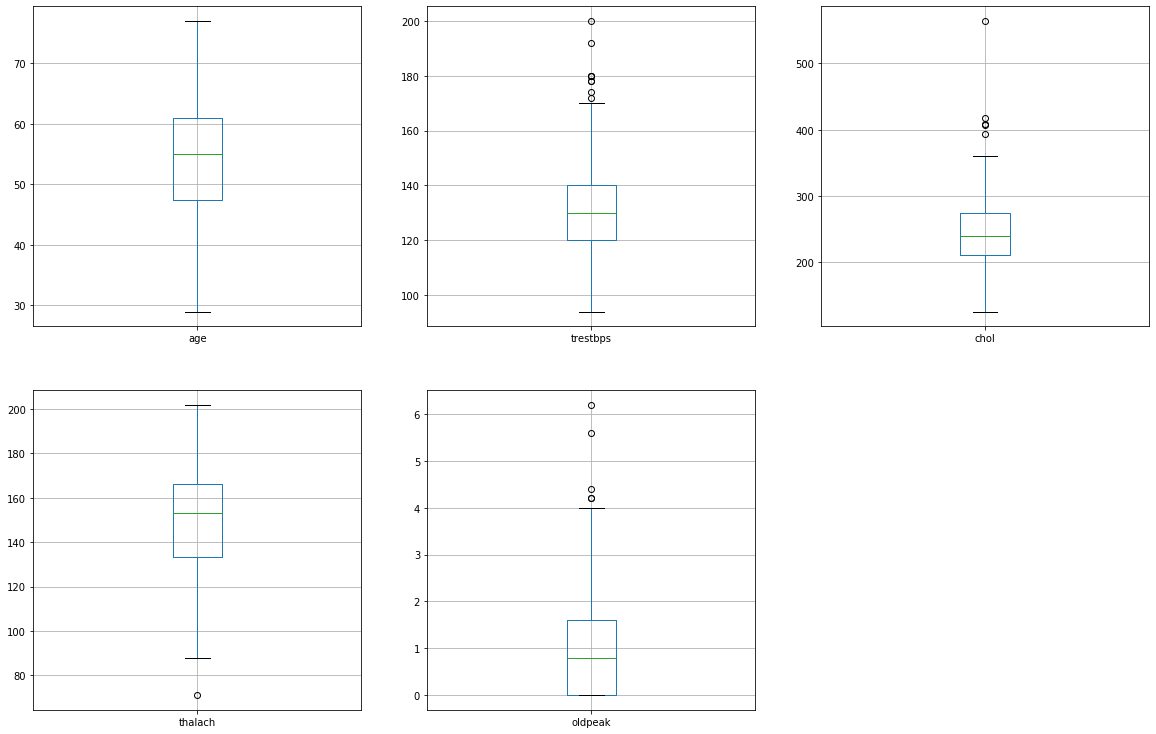

In [18]:
# plotting boxplot of continuous variables to see the data distribution, anamolies and outliers
plt.figure(figsize=(20, 20))

for i, column in enumerate(cont_var, start=1):
    plt.subplot(3, 3, i)
    df.boxplot(column=column)

From the above box plots we can see that we have few outliers in some the of variables. I am uncertain at this point whether to deal with these outliers or not. But will certainly revist this if I face any issues with model performance.

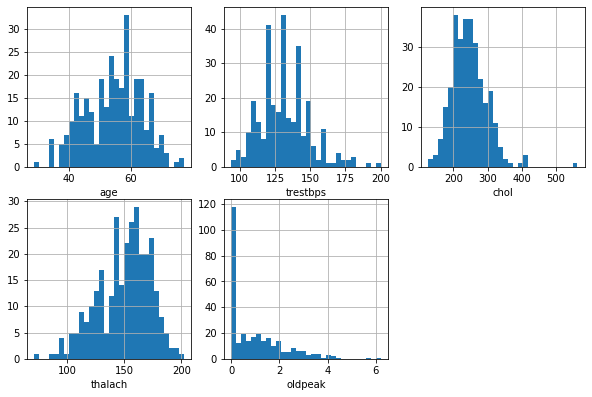

In [19]:
# Plotting the histogram of continuous variables to see the data distribution
plt.figure(figsize=(10, 10))

for i, column in enumerate(cont_var, 1):
    plt.subplot(3, 3, i)
    df[column].hist(bins=30)
    plt.xlabel(column)

From the above histogram plots, we can see that oldpeak has a right skewed distribution.

I further wish to see the top ages where the patients have suffered heart disease.

In [20]:
comp = pd.crosstab(df["age"], df["target"], rownames=["Age"], colnames=["Heart Disease"])

In [21]:
comp.sort_values(by=1,ascending=False).head(10)

Heart Disease,0,1
Age,,
54,6,10
41,1,9
51,3,9
52,4,9
44,3,8
57,10,7
58,12,7
42,1,7
53,2,6


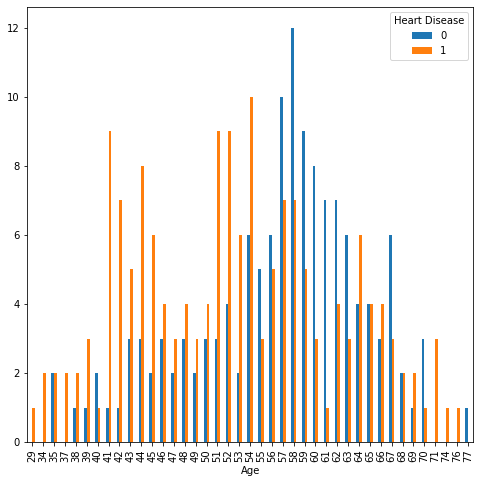

In [22]:
comp.plot.bar(figsize=(8,8))

From the above table as well as the histogram we can see that at the age of 54 people have suffered heart disease the most and most patients are in the age range of 41 to 54.

In [23]:
# plt.figure(figsize=(5, 5))
# for i, column in enumerate(category_var, 1):
#     pd.crosstab(index=df[column], columns=df["target"]).plot(kind="bar", figsize=(8,8), stacked=True, legend=True)
    

We will now further perform bi-variate analysis on categorical variables especially to see how they are comparing against the target variable.

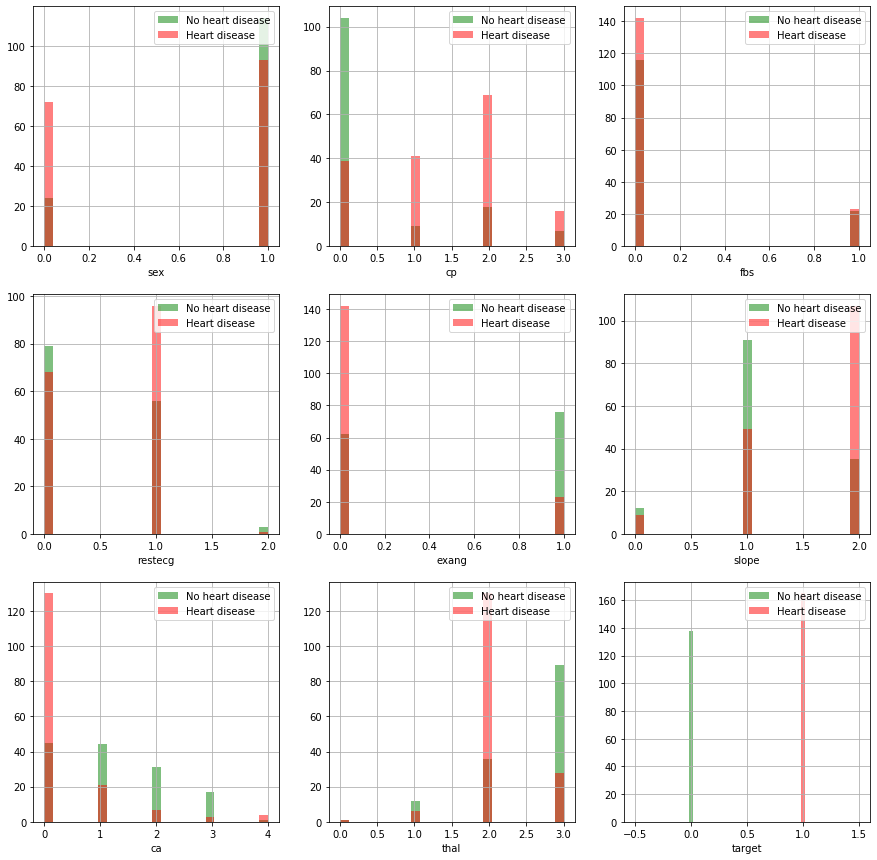

In [24]:
# https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib
pyplot.figure(figsize=(15, 15))
for i, var in enumerate(category_var, start=1):
    plt.subplot(3, 3, i)
    pyplot.hist(df[df["target"] == 0][var], bins=25, alpha=0.5, label='No heart disease', color="green")
    pyplot.hist(df[df["target"] == 1][var], bins=25, alpha=0.5, label='Heart disease', color="red")
    pyplot.legend(loc='upper right')
    plt.xlabel(var)
    plt.grid(True)
    #pyplot.show()

Few observations from the above plots.

- Males suffer from heart disease more than females.
- People who suffer from chest pain (cp) of levels 1,2 and 3 are likely to suffer from heart disease.
- People with fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) of more than 120 mg/dl are likely to suffer from heart disease.
- Patients with restecg: resting electrocardiographic results of value 1 (abnormal) are suffering from heart disease more than values 0 and 2.
- exang: exercise induced angina (1 = yes; 0 = no); people without exercise angina have more chances of suffering with heart disease.
- slope; People with downsloping from exercise are more likely to suffer heart disease.
- ca: number of major vessels (0-3); People with 0 level of major vessels are suffering heart disease more.<br>
- thal: 0-3 = normal; 6 = fixed defect; 7 = reversable defect; People with fixed defect are the victims of heart disease.

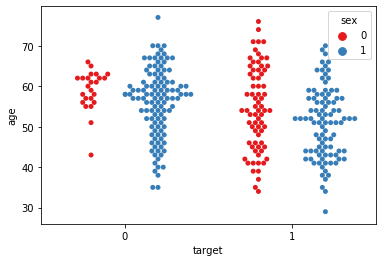

In [25]:
# how many males and female patients
sns.swarmplot(x="target", y="age", hue='sex', data=df, palette="Set1", dodge=True)

In [26]:
# In the next steps we will subset the dataframe to include only continuous variables to generate correlation
# matrix between them to see if any of the variables have strong relationship between them.
cont_var

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [27]:
cont_data = df[df.columns.intersection(cont_var)]

In [28]:
cont_data.head(5)

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


#### Correlation matrix of continuous variables

In [29]:
cont_data.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


We can observe that none of the continuous variables have strong relationship with each other eliminating the possibility of multi-colinearity.

#### Correlation matrix heatmap

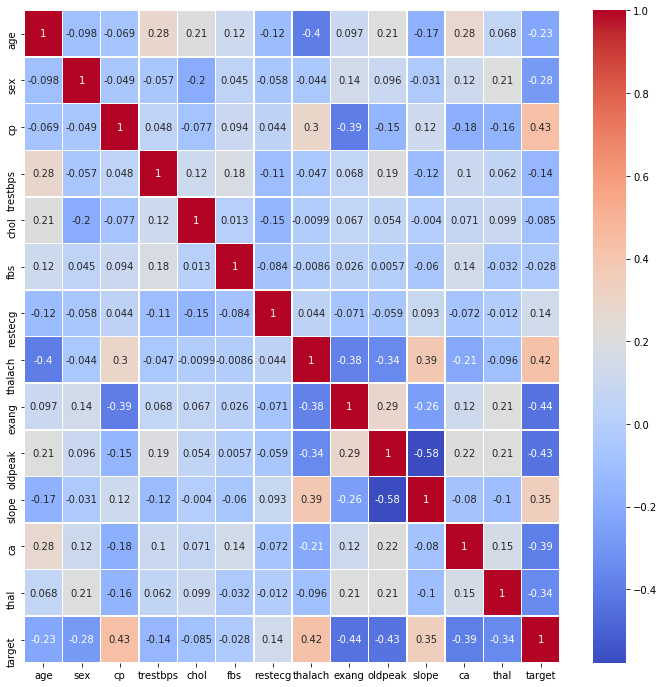

In [30]:
plt.figure(figsize=(12,12))
           
sns.heatmap(df.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')

From the above heatmap we can observe that variables cp, thalach, exang, oldpeak, slope, ca and thal have moderate correlation with the target variable heart disease.

In the next step, I am interested to compare the max heart rate of different ages between male and females and look for any interesting findings.

In [31]:
# Subsetting the dataset to include only males
male_pat = df.loc[df["sex"]==1]

In [32]:
male_pat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


In [33]:
# Subsetting the dataset to include only females
female_pat = df.loc[df["sex"]==0]

In [34]:
female_pat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


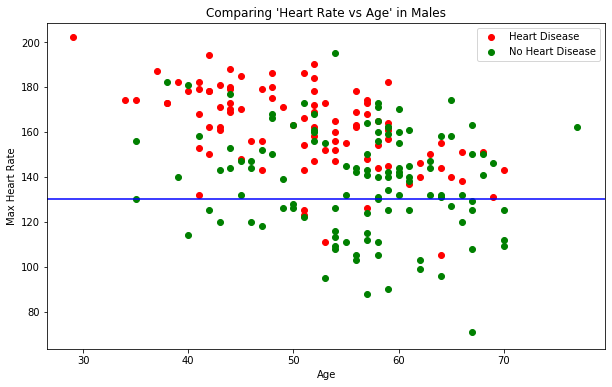

In [35]:
plt.figure(figsize=(10, 6))

plt.scatter(male_pat.age[male_pat.target==1], male_pat.thalach[male_pat.target==1], c="red")
plt.scatter(male_pat.age[male_pat.target==0], male_pat.thalach[male_pat.target==0], c="green")

plt.title("Comparing 'Heart Rate vs Age' in Males")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "No Heart Disease"]);
plt.axhline(130, color='blue')

- From the above scatter plot we can conclude that most male patients whose maximum heart rate reached above 130 bpm were likely to suffer from heart disease since heart rate between 60-100 bpm is considered normal.
- We can also observe that there was one patient at the age of 29 who suffered from heart disease whose heart rate was above 200 bpm.
- We can also conclude that age is not a primary factor for males to suffer from a heart disease as the data is spread across all ages in the above plot.

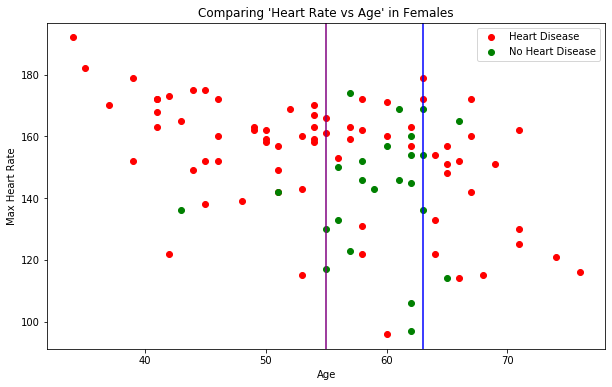

In [36]:
plt.figure(figsize=(10, 6))

plt.scatter(female_pat.age[female_pat.target==1], female_pat.thalach[female_pat.target==1], c="red")
plt.scatter(female_pat.age[female_pat.target==0], female_pat.thalach[female_pat.target==0], c="green")

plt.title("Comparing 'Heart Rate vs Age' in Females")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "No Heart Disease"]);
plt.axvline(63, color='blue')
plt.axvline(55, color='purple')

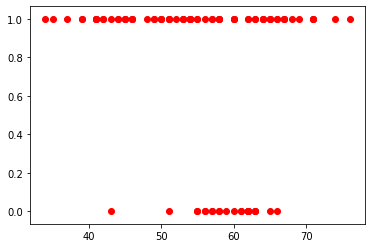

In [37]:
plt.scatter(female_pat.age, female_pat.target, c="red")

- From the above two plots I am really surprised and shocked to find out that, unlike in males where heart rate above 130 bpm was a factor to predict if the person is likely to suffer from heart disease and not age, in females age seems to be a factor. Females below the age of 55 and above the age of 63 were the most victims of heart disease.

## Model development

In [38]:
from sklearn.model_selection import train_test_split

#### Subsetting the dataframe in predictors f(X) and target variable (y).

In [39]:
#Changing pandas dataframe to numpy array
X = df.iloc[:,:13].values
y = df.iloc[:,13:14].values

#### Normalising the data

In [40]:
# Normalisation is a technique used to change the values... 
# ...of an array to a common scale, without distorting differences in the ranges of values.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#### Splitting the data into train and test sets

In [92]:
# Splitting the dataframe into training testing sets with the ratio 70% for training and 30% for testing.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Keras - Deep neural network model

In [42]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/roshanwahane/anaconda3/lib/p

In [43]:
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=13, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [44]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [45]:
keras_mod = model.fit(X_train, y_train, epochs=100, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
212/212 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5943
Epoch 2/100
212/212 [==============================] - 0s 83us/step - loss: 0.6755 - accuracy: 0.6038
Epoch 3/100
212/212 [==============================] - 0s 65us/step - loss: 0.6613 - accuracy: 0.6179
Epoch 4/100
212/212 [==============================] - 0s 178us/step - loss: 0.6479 - accuracy: 0.6321
Epoch 5/100
212/212 [==============================] - 0s 102us/step - loss: 0.6348 - accuracy: 0.6604
Epoch 6/100
212/212 [==============================] - 0s 81us/step - loss: 0.6225 - accuracy: 0.6745
Epoch 7/100
212/212 [==============================] - 0s 71us/step - loss: 0.6102 - accuracy: 0.6840
Epoch 8/100
212/212 [==============================] - 0s 53us/step - loss: 0.5987 - accuracy: 0.7075
Epoch 9/100
212/212 [==============================] - 0s 111us/step - loss: 0.5877 - accuracy: 0.7170
Epoch 10/100
212/212 [==========

In [46]:
keras_pred = model.predict(X_test)

In [47]:
rounded = [round(x[0]) for x in keras_pred]

In [48]:
keras_pred = rounded

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, plot_confusion_matrix
score = round(accuracy_score(keras_pred,y_test)*100,2)

In [50]:
print("Prediction accuracy rate of the Keras model is", score, "%")

Prediction accuracy rate of the Keras model is 82.42 %


In [51]:
confusion_matrixk = confusion_matrix(y_test, keras_pred)
print(confusion_matrixk)

[[32  9]
 [ 7 43]]


#### Logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
logreg_y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [55]:
confusion_matrixl = confusion_matrix(y_test, logreg_y_pred)
print(confusion_matrixl)

[[32  9]
 [ 8 42]]


#### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rand_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
rand_forest.fit(X_train, y_train)

/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [58]:
randf_y_pred = rand_forest.predict(X_test)
#print('Accuracy of random forest classifier on test set: {:.2f}'.format(rand_forest.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.81


In [59]:
confusion_matrixrf = confusion_matrix(y_test, randf_y_pred)
print(confusion_matrixrf)

[[32  9]
 [ 8 42]]


#### XGBoost

In [61]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [62]:
xgb_y_pred = xgb.predict(X_test)
#print('Accuracy of random forest classifier on test set: {:.2f}'.format(xgb.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.85


In [63]:
confusion_matrixxgb = confusion_matrix(y_test, xgb_y_pred)
print(confusion_matrixxgb)

[[35  6]
 [ 8 42]]


In [64]:
# Test accuracy of the models - Keras, Logistic Regression, Random Forest, XGBoost

In [65]:
print("Prediction accuracy rate of the Keras model is", score, "%")

Prediction accuracy rate of the Keras model is 82.42 %


In [66]:
print("Prediction accuracy rate of the Logistic Regression model is", round(accuracy_score(logreg_y_pred,y_test)*100,2), "%")

Prediction accuracy rate of the Logistic Regression model is 81.32 %


In [67]:
print("Prediction accuracy rate of the Random Forest model is", round(accuracy_score(randf_y_pred,y_test)*100,2), "%")

Prediction accuracy rate of the Random Forest model is 81.32 %


In [68]:
print("Prediction accuracy rate of the XGBoost model is", round(accuracy_score(xgb_y_pred,y_test)*100,2), "%")

Prediction accuracy rate of the XGBoost model is 84.62 %


From the above comparision we can see that XGBoost model has produced the best accuracy on the test data.

#### Feature importance

In [81]:
X_col = df.iloc[:,:13]

In [90]:
feature_importances = pd.DataFrame(xgb.feature_importances_,
                                   index = X_col.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [91]:
feature_importances

,importance
cp,0.173648
ca,0.162646
exang,0.151186
thal,0.146076
slope,0.084785
oldpeak,0.065941
trestbps,0.041492
age,0.036283
thalach,0.032083
fbs,0.028345


XGBoost model ranked cp , ca, exang, thal the top most important features to predict the heart disease amongst patients.

Future work - We can try build different models only with selected features and check if the accuray can increase. Furhtermore, we can also tune the parameters of the XGBoost model to try to produce better accuracy.